##### 백엔드 코드

In [1]:
import pandas as pd

# 데이터 불러오기 
data = pd.read_csv('datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
data.head(10)
print(data.shape)

C:\Users\jinhy\AppData\Local\Temp\ipykernel_31160\1726811543.py:4: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('datasets/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


(2622133, 38)


In [2]:
### 데이터 파악

# 데이터 타입이 mixed 인 컬럼 : [1, 2, 7, 11, 29] 번 째 컬럼
columns = data.columns # 전체 컬럼
for column in columns:
    print(data[column].apply(type).value_counts())

# mixed 데이터 명명 
mixed_columns_index = [1, 2, 7, 11, 29]
mixed_columns_name = data.columns[mixed_columns_index]

# Major 데이터 타입 확인
for column in mixed_columns_name:
    print(data[column].apply(type).unique())
    print(data[column].apply(type).value_counts())

# Minor 데이터 정체 확인 
## 1, 'Health Service Area', 'Hospital County', 'Patient Disposition' -> 결측치 처리 필요
## 2. 'Zip Code - 3 digits' -> 환자 거주지역을 나타내는 의미없는 데이터 -> Drop 
for column in mixed_columns_name:
    not_str_index = data[column].apply(lambda x: type(x) == str)
    print(data[column][~not_str_index].value_counts(dropna=False))


index
<class 'int'>    2622133
Name: count, dtype: int64
Health Service Area
<class 'str'>      2617246
<class 'float'>       4887
Name: count, dtype: int64
Hospital County
<class 'str'>      2617246
<class 'float'>       4887
Name: count, dtype: int64
Operating Certificate Number
<class 'float'>    2622133
Name: count, dtype: int64
Facility ID
<class 'float'>    2622133
Name: count, dtype: int64
Facility Name
<class 'str'>    2622133
Name: count, dtype: int64
Age Group
<class 'str'>    2622133
Name: count, dtype: int64
Zip Code - 3 digits
<class 'str'>      2061890
<class 'int'>       524288
<class 'float'>      35955
Name: count, dtype: int64
Gender
<class 'str'>    2622133
Name: count, dtype: int64
Race
<class 'str'>    2622133
Name: count, dtype: int64
Ethnicity
<class 'str'>    2622133
Name: count, dtype: int64
Length of Stay
<class 'str'>    2523136
<class 'int'>      98997
Name: count, dtype: int64
Type of Admission
<class 'str'>    2622133
Name: count, dtype: int64
Patient Disp

In [3]:
### 데이터 전처리 - 결측치 및 비정상적인 값 처리
pd.set_option('display.max_columns', None)

# 'Length of Stay' 컬럼 처리
## 문자열 등 비정상적인 값은 NaN으로 변환
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')
## NaN이 된 행은 제거
df = data.dropna(subset=['Length of Stay'])
## float → int 로 형변환 (NaN 제거되었으므로 안전)
df['Length of Stay'] = df['Length of Stay'].astype(int)

# NaN 개수가 너무 많은 컬럼 제거
## Source of Payment 2, Source of Payment 3, Operating Provider License Number, Other Provider License Number 컬럼
nan_columns = df.columns[df.isna().sum() > 10_000]
df = df.drop(columns=nan_columns)

# 의미없는 컬럼 제거 
# 'Zip Code - 3 digits'(우편번호) / 'index'(인덱스)
# 'Attending Provider License Number'(주치의 면허번호) / 'Operating Certificate Number'(운영 인증 번호)
df = df.drop(columns=['Zip Code - 3 digits', 'index', 'Attending Provider License Number', 'Operating Certificate Number'])

# 'Birth Weight' 컬럼 처리 - Birth Weight = 0인 데이터 삭제
# 삭제 전 총 데이터 수
total_before = len(df)
# 'Birth Weight' 컬럼값이 0인 데이터 삭제
df = df[df['Birth Weight'] != 0]
# 삭제 후 총 데이터 수
total_after = len(df)
# 삭제된 데이터 수
deleted_rows = total_before - total_after
# 결과 출력
print(f"삭제 전 데이터 수: {total_before}")
print(f"삭제 후 데이터 수: {total_after}")
print(f"'Birth Weight' 값이 0인 데이터 개수(삭제된 행 수): {deleted_rows}")

C:\Users\jinhy\AppData\Local\Temp\ipykernel_31160\689745897.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = df['Length of Stay'].astype(int)


삭제 전 데이터 수: 2619918
삭제 후 데이터 수: 250199
'Birth Weight' 값이 0인 데이터 개수(삭제된 행 수): 2369719


'Total Charges' 컬럼 이상치 수 (|Z| > 2): 4839개
'Total Costs' 컬럼 이상치 수 (|Z| > 2): 4958개
'Length of Stay' 컬럼 이상치 수 (|Z| > 2): 6052개
'Birth Weight' 컬럼 이상치 수 (|Z| > 2): 9675개


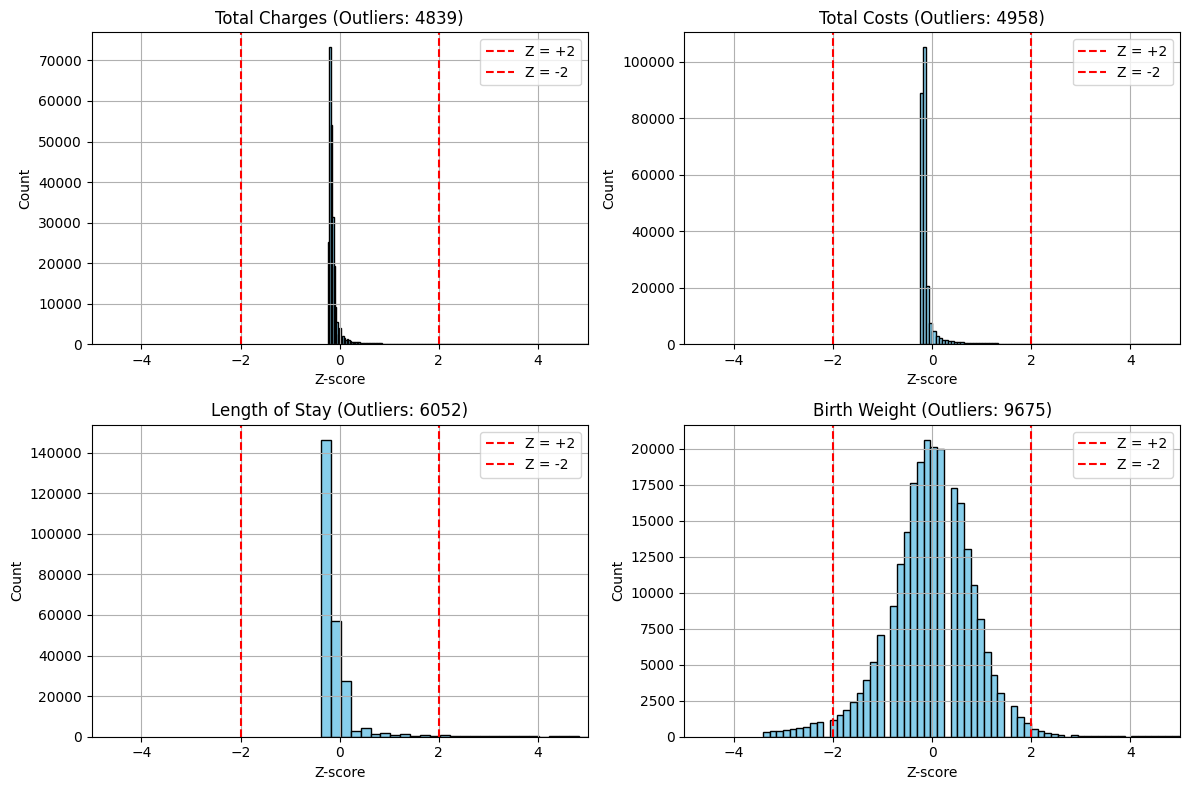


총 제거된 이상치 행 수: 11783개
'Health Service Area' 컬럼에는 희귀 범주 없음
'Hospital County' 컬럼에서 희귀 범주 발견 (34개): ['Jefferson', 'Chemung', 'Warren', 'Chautauqua', 'Rensselaer', 'Niagara', 'Ontario', 'Otsego', 'St Lawrence', 'Clinton', 'Tompkins', 'Saratoga', 'Cattaraugus', 'Steuben', 'Oswego', 'Sullivan', 'Ulster', 'Madison', 'Genesee', 'Montgomery', 'Columbia', 'Cortland', 'Franklin', 'Putnam', 'Fulton', 'Cayuga', 'Wayne', 'Allegany', 'Wyoming', 'Livingston', 'Lewis', 'Chenango', 'Schuyler', 'Orleans']
'Facility ID' 컬럼에서 희귀 범주 발견 (114개): [924.0, 411.0, 1437.0, 1288.0, 213.0, 3975.0, 1638.0, 1165.0, 599.0, 630.0, 1692.0, 1633.0, 1045.0, 1438.0, 527.0, 896.0, 776.0, 528.0, 58.0, 1117.0, 1302.0, 1186.0, 1122.0, 1286.0, 1097.0, 367.0, 913.0, 1320.0, 686.0, 1318.0, 116.0, 1454.0, 1005.0, 943.0, 552.0, 471.0, 1294.0, 513.0, 1139.0, 694.0, 1176.0, 43.0, 1129.0, 1072.0, 1445.0, 135.0, 628.0, 1039.0, 746.0, 977.0, 192.0, 818.0, 66.0, 1635.0, 755.0, 889.0, 98.0, 727.0, 678.0, 971.0, 589.0, 103.0, 990.0, 671.0,

Health Service Area                    0.000000
Hospital County                        0.123901
Facility ID                            0.553559
Facility Name                          0.553559
Age Group                              0.000000
Gender                                 0.019185
Race                                   0.000000
Ethnicity                              0.000000
Type of Admission                      0.055156
Discharge Year                         0.000000
CCS Diagnosis Code                     0.744208
CCS Diagnosis Description              0.744208
CCS Procedure Code                     1.382899
CCS Procedure Description              1.382899
APR DRG Code                           1.478423
APR DRG Description                    1.478423
APR MDC Code                           0.476421
APR MDC Description                    0.476421
APR Severity of Illness Code           0.048761
APR Severity of Illness Description    0.000000
APR Risk of Mortality                  0

In [4]:
### 데이터 전처리 - 이상치 처리 
from modules.category_utils import preview_rare_categories, replace_and_report_rare_categories
from modules.number_utils import plot_zscore_outliers_all, remove_zscore_outliers_all

num_columns = ['Total Charges', 'Total Costs', 'Length of Stay', 'Birth Weight']
cate_columns = [col for col in df.columns
                if col not in num_columns + ['Patient Disposition']]

# 수치형 컬럼의 이상치 여부를 확인하고, 이상치를 제거합니다.
num_columns = ['Total Charges', 'Total Costs', 'Length of Stay', 'Birth Weight']
bins = [1000, 1000, 80, 100]

## 1) 이상치 시각화
plot_zscore_outliers_all(df, columns=num_columns, bins_list=bins, z_thresh=2)

## 2) 이상치 제거
df_cleaned = remove_zscore_outliers_all(df, columns=num_columns, z_thresh=2)



# 범주형 컬럼의 이상치 여부를 확인하고, 이상치를 Others로 대체합니다.

## 1) 이상치 시각화
rare_info = preview_rare_categories(df, columns=cate_columns, threshold=0.01)
print(rare_info)

## 2) 이상치 대체
replace_and_report_rare_categories(df,cate_columns)


In [5]:
### 모델 선정 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 대략적인 모델별 성능 비교
# -------------------------------

# -------------------------------
# 컬럼 종류 확인
# -------------------------------

# 고유값 개수 확인
df.nunique()

# 종류별 컬럼 명명 
num_columns = ['Total Charges', 'Total Costs', 'Length of Stay', 'Birth Weight']
cate_columns = [col for col in df.columns
                if col not in num_columns + ['Patient Disposition']]

# -------------------------------
# 공통 전처리 파이프라인 구성
# -------------------------------
# 범주형 데이터 전처리 - Tree based 모델(DecisionTree, RandomForest, XGBoost 등) + Support Vector 모델 
cat_pipeline = make_pipeline( 
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)
# 범주형 데이터 전처리 - 비 Tree based 모델(LogisticRegression 등)
cat2_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
)

num_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)

preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])

preprocessor2 = ColumnTransformer([
    ('cat', cat2_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])

# -------------------------------
# 데이터 분할
# -------------------------------

# 이진 분류 문제로 변환 
X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'].values == 'Left Against Medical Advice', 1, 0)

# 데이터 셋 분할 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.005, test_size=0.0001, random_state=42, stratify=y)

# -------------------------------
# 사용할 회귀 모델 정의
# -------------------------------
models = {
    'LogisticRegression' : LogisticRegression(),
    'KNNNeighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}

# -------------------------------
# 모델 학습 및 성능 비교
# -------------------------------

results = []
print("="*20, "이진 분류 모델 성능 비교", "="*20)
for name, model in models.items():

    # 레이블 인코딩을 사용하는 모델
    if name in ['KNNNeighbors', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']:
        pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
        ])
    # SVC 모델 - PCA 적용
    elif name == 'Support Vector Classifier':
        pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('pca', pca),
        ('model', model)
        ])
    # LogisticRegression 모델 - OneHotEncoding 적용
    else:
        pipeline = Pipeline([
        ('preprocessor', preprocessor2),
        ('model', model)
        ])

    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)
    y_pred = np.where(y_pred_proba[:, 1] > 0.3, 1, 0)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"[{name}] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

==================== 이진 분류 모델 성능 비교 ====================


TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']

In [ ]:
# 선정된 모델 최적화 
from modules.get_best_model import get_best_model

# 평가지표 초기화 
results = []

## Logistic Regression 모델 최적화
from sklearn.linear_model import LogisticRegression
# 파라미터 그리드 설정
params = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear', 'saga']
}
logistic_model, logistic_params, logistic_scores = get_best_model(LogisticRegression(), params, preprocessor2, X_train, y_train)
# 평가지표 저장
results.append({name : 'LogisticRegression', **logistic_scores})
pred_proba_logistic = logistic_model.predict_proba(X_test)

## Random Forest 모델 최적화
from sklearn.ensemble import RandomForestClassifier
# 파라미터 그리드 설정
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [None, 5, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
randomforest_model, randomforest_params, randomforest_scores = get_best_model(RandomForestClassifier(), params, preprocessor, X_train, y_train)
# 평가지표 저장
results.append({name : 'RandomForestClassifier', **randomforest_scores})
pred_proba_randomforest = randomforest_model.predict_proba(X_test)

## XGBoost 모델 최적화
from xgboost import XGBClassifier
# 파라미터 그리드 설정
params = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.5, 0.7, 1.0],
    'model__colsample_bytree': [0.5, 0.7, 1.0]
}
xgb_model, xgb_params, xgb_scores = get_best_model(XGBClassifier(), params, preprocessor, X_train, y_train)
# 평가지표 저장
results.append({name : 'XGBClassifier', **xgb_scores})
pred_proba_xgb = xgb_model.predict_proba(X_test)

In [ ]:
# results : accuracy, precision, recall, f1 score가 포함된 딕셔너리 리스트
# pred_proba_logistic, pred_proba_randomforest, pred_pmroba_xgb : 각 모델의 예측 확률
### 모델별 결과 시각화 - 평가지표
results_df = pd.DataFrame(results)
results_df 

,Model,Accuracy,Precision,Recall,F1 Score
0,LogisticRegression,0.982824,0.730769,0.333333,0.457831
1,KNNNeighbors,0.979771,0.562500,0.315789,0.404494
2,Decision Tree,0.971374,0.375000,0.473684,0.418605
3,Random Forest,0.983969,0.800000,0.350877,0.487805
4,Gradient Boosting,0.984733,0.904762,0.333333,0.487179
5,XGBoost,0.983206,0.685714,0.421053,0.521739
6,Support Vector Classifier,0.982061,0.812500,0.228070,0.356164


In [ ]:
### 모델별 결과 시각화 - 혼동행렬

In [ ]:
### 모델별 결과 시각화 - PR Curve, ROC Curve

In [ ]:
# 최적 모델 불러와서 predict_proba 해서 accuracy, precision, recall, f1 score 등 평가지표 보고 시각화 하고 이미지 저장까지 해야대 